<a href="https://colab.research.google.com/github/ShashiPriya9/Case-Study-on-Netflix-Data-Analysis-/blob/main/Project_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("https://gist.github.com/singhsidhukuldeep/564f271315abb6bc22647e81e6bf4762/raw/66fb67a8bb014df6b7f924aad0a91aa662bc7fc2/netflix_titles.csv")
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Un-nesting the columns
Columns_unnesting=["cast","country","title","director","listed_in"]
for column in Columns_unnesting:
  df[column]=df[column].str.split(', ')
  df=df.explode(column)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
#Handling null values
Categorical_handlingnulls = ["director","cast","country"]
for column in Categorical_handlingnulls:
  df[column]=df[column].fillna(f'unknown {column}')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
Numerical_handlingnulls = ["duration","rating","date_added"]
for column in Numerical_handlingnulls:
  df[column]=df[column].fillna(0)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
#Check for the null values after Handling null values.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#1. Find the counts of each categorical variable both using graphical and nongraphical analysis.
#a. For Non-graphical Analysis:
#Country- Column
df.groupby("country")["title"].nunique().sort_values(ascending=False)


country
United States      3739
India              1052
unknown country     847
United Kingdom      811
Canada              450
                   ... 
Montenegro            1
Somalia               1
Mongolia              1
Botswana              1
Poland,               1
Name: title, Length: 128, dtype: int64

**INSIGHT:** By this we understood, United States, India are on the top with highest no. of movies or TV shows

In [ ]:
#Cast- Column
df.groupby("cast")["title"].nunique().sort_values(ascending=False)


cast
unknown cast        844
Anupam Kher          43
Shah Rukh Khan       35
Naseeruddin Shah     35
Julie Tejwani        33
                   ... 
Jane McLean           1
Jane McCarry          1
Jane Kaczmarek        1
Jane Hallaren         1
Ṣọpẹ́ Dìrísù          1
Name: title, Length: 36440, dtype: int64

**INSIGHT**: Here we can see most popular actions are Unknown(null), Anupam Kher with 43 no. of movies casted followed by Shah Rukh Khan, Naseeruddin Shah.

In [ ]:
#Director- Column
df.groupby("director")["title"].nunique().sort_values(ascending=False)


director
unknown director    2669
Jan Suter             22
Rajiv Chilaka         22
Raúl Campos           19
Marcus Raboy          17
                    ... 
Julio Medem            1
Julio Quintana         1
Julius Avery           1
Julius Onah            1
Barry Jenkins          1
Name: title, Length: 4994, dtype: int64

**INSIGHT**: Most of the movies or TV shows directed by unknown director & Jan Suter, Rajiv Chilaka.

In [ ]:
#Title- Column
df.groupby("title")["title"].nunique().sort_values(ascending=False)


title
#Alive                        1
Rise: Ini Kalilah             1
Rip Tide                      1
Riphagen - The Untouchable    1
Ripper Street                 1
                             ..
Happy New Year                1
Happy Jail                    1
Happy Hunting                 1
Happy Go Lucky                1
최강전사 미니특공대 : 영웅의 탄생           1
Name: title, Length: 8927, dtype: int64

**INSIGHT**: Every title is unique here.

In [ ]:
#Type- Column
df.groupby("type")["title"].nunique().sort_values(ascending=False)


type
Movie      6224
TV Show    2707
Name: title, dtype: int64

**INSIGHT**: By the above code we understood there are 6224 movies and 2707 TV shows.

In [ ]:
#Rating- Column
df.groupby("rating")["title"].nunique().sort_values(ascending=False)


rating
TV-MA       3273
TV-14       2190
TV-PG        872
R            809
PG-13        494
TV-Y7        338
TV-Y         310
PG           290
TV-G         226
NR            80
G             41
TV-Y7-FV       6
0              4
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: title, dtype: int64

**INSIGHT**: TV-MA, TV-14, TV-PG, R, PG-13 are the top ratings for the movies ot TV shows.

In [ ]:
#listed_in- Column
df.groupby("listed_in")["title"].nunique().sort_values(ascending=False)


listed_in
International Movies            2794
Dramas                          2450
Comedies                        1710
International TV Shows          1371
Documentaries                    891
Action & Adventure               867
TV Dramas                        770
Independent Movies               768
Children & Family Movies         648
Romantic Movies                  626
TV Comedies                      585
Thrillers                        582
Crime TV Shows                   478
Kids' TV                         455
Docuseries                       401
Music & Musicals                 381
Romantic TV Shows                378
Stand-Up Comedy                  360
Horror Movies                    358
Reality TV                       260
British TV Shows                 255
Sci-Fi & Fantasy                 243
Sports Movies                    223
Spanish-Language TV Shows        180
Anime Series                     177
TV Action & Adventure            169
Korean TV Shows             

**INSIGHT**: International Movies,Dramas,Comedy, International TV shows, Documentaries are top 5 listed movies genres.

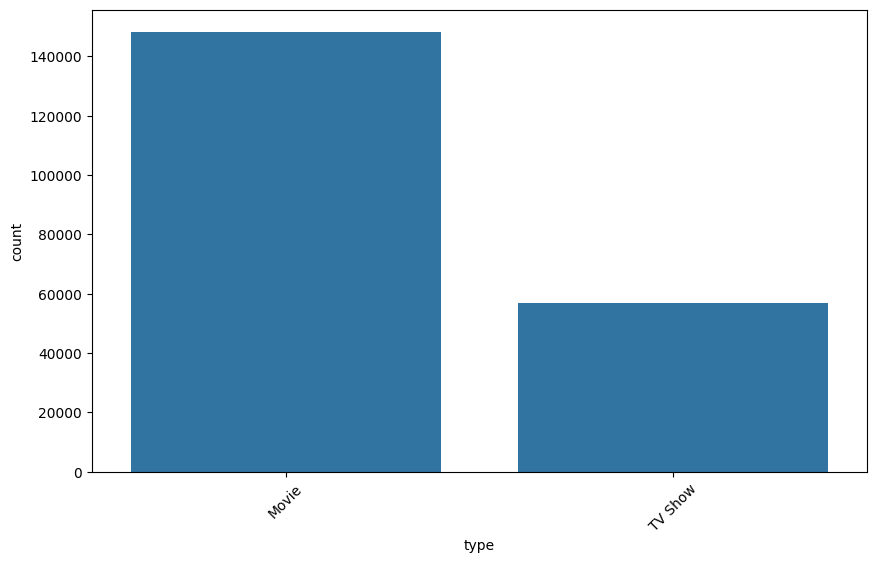

In [ ]:
#b.Non graphical analysis
#type- Column
cat_counts=df["type"].value_counts().index[:3]
plt.figure(figsize=(10,6))

sns.countplot(data=df, x="type",order=cat_counts.index)
plt.xticks(rotation=45)
plt.show()

**INSIGHT**: By this graphical analysis we understood there are more number of movies than TV shows in the Netflix.

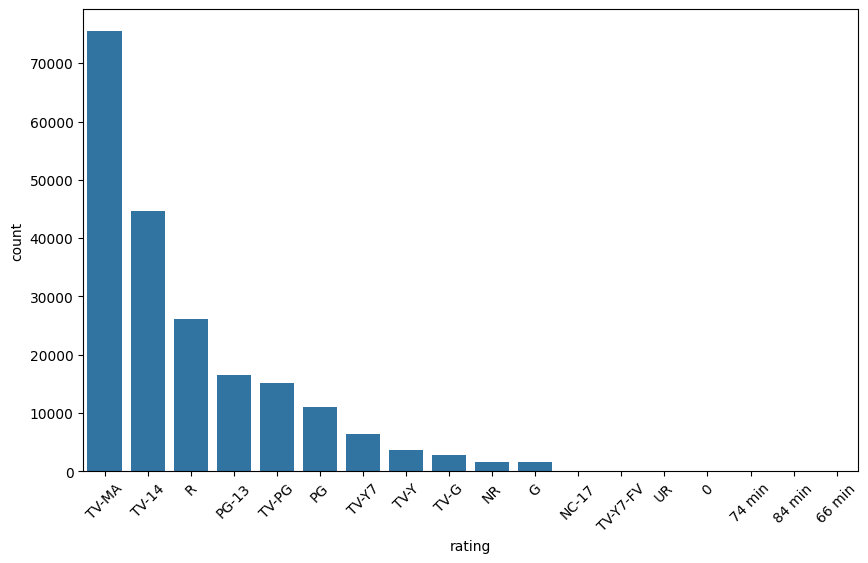

In [ ]:
#Rating- Column
cat_counts=df["rating"].value_counts()
plt.figure(figsize=(10,6))

sns.countplot(data=df, x="rating",order=cat_counts.index)
plt.xticks(rotation=45)
plt.show()

**INSIGHT**: TV-MA, TV-14, R are with the highest rating followed by PG-13, TV-PG, PG.

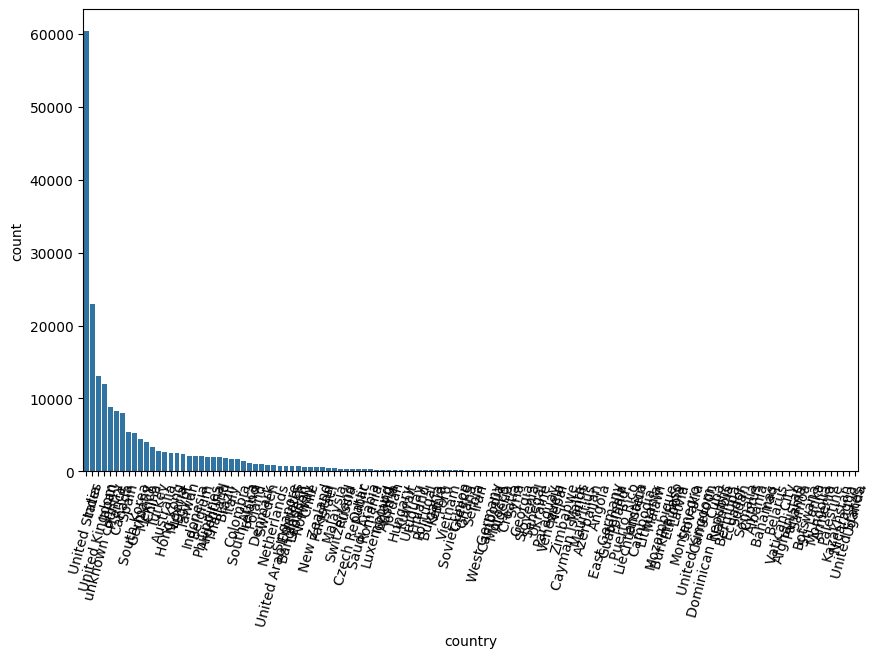

In [ ]:
#Country- Column
cat_counts=df["country"].value_counts()
plt.figure(figsize=(10,6))

sns.countplot(data=df, x="country",order=cat_counts.index)
plt.xticks(rotation=75)
plt.show()

**INSIGHT**: Countries like US, India are on the top in the category of movies, TV Shows.

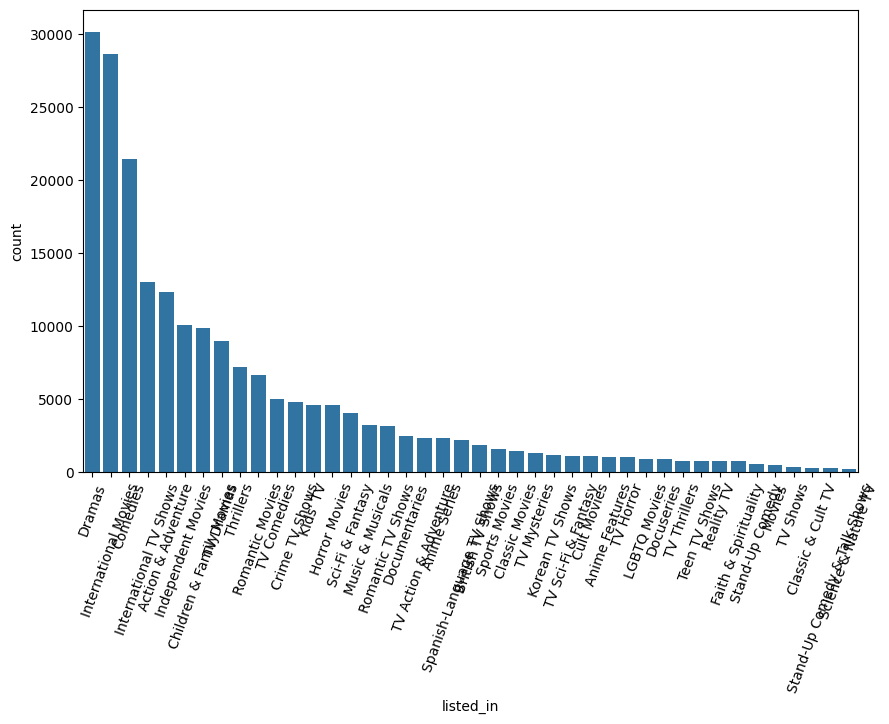

In [ ]:
#listed_in- Column
cat_counts=df["listed_in"].value_counts()
plt.figure(figsize=(10,6))

sns.countplot(data=df, x="listed_in",order=cat_counts.index)
plt.xticks(rotation=70)
plt.show()

**INSIGHT**: International movies, Dramas, Comedies are top genres that people watch on Netflix.So people are more interested in this genres.

In [ ]:
#2. Comparison of tv shows vs movies.
#a. Find the number of movies produced in each country and pick the top 10 countries.
df_Movie=df.loc[df["type"]=="Movie"]
df_Movie.groupby("country")["title"].nunique().sort_values(ascending=False).head(10)


country
United States      2792
India               968
United Kingdom      538
unknown country     450
Canada              324
France              308
Germany             185
Spain               175
Japan               123
Mexico              117
Name: title, dtype: int64

In [ ]:
#b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.
df_tvshow=df.loc[df["type"]=="TV Show"]
df_tvshow.groupby("country")["title"].nunique().sort_values(ascending=False).head(10)


country
United States      950
unknown country    397
United Kingdom     273
Japan              200
South Korea        174
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: title, dtype: int64

**INSIGHT**: Here we can see United States is the only Country which is top in movies and TV shows and other countries like India is in second place in Movies while Unknown Country in TV shows. It is to recommend that US to continue producing and get many other from other countries as well.

In [ ]:
#3. What is the best time to launch a TV show?
#a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

#Convert date_added to datetime format

df['date_added']=pd.to_datetime(df['date_added'],format='mixed')


In [ ]:
#extracting week,month,year from the date_added column
df["month_added"]=df["date_added"].dt.month

In [ ]:
df["year_added"]=df["date_added"].dt.year

In [ ]:
df["week_added"]=df["date_added"].dt.strftime('%U')

In [ ]:
df_tvshow=df.loc[df["type"]=="TV Show"]

In [ ]:
df_tvshow.groupby('week_added')['title'].nunique().sort_values(ascending=False).head().reset_index(name="No_of_shows_released")


,week_added,No_of_shows_released
0,39,96
1,31,87
2,13,85
3,26,84
4,27,83


In [ ]:
df_Movie=df.loc[df["type"]=="Movie"]

In [ ]:
df_Movie.groupby('week_added')['title'].nunique().sort_values(ascending=False).head().reset_index(name="No_of_movies_released")

,week_added,No_of_movies_released
0,00,255
1,39,245
2,26,236
3,13,232
4,43,207


**INSIGHT**: By this analysis, we understood on average 39th, 26th, 13th weeks are the best time to release a movie or TV show in the Netflix.

In [ ]:
#b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

df_tvshow.groupby('month_added')['title'].nunique().sort_values(ascending=False).head().reset_index(name="No_of_shows_released")

,month_added,No_of_shows_released
0,12,269
1,7,264
2,9,253
3,6,239
4,8,237


In [ ]:
df_Movie.groupby('month_added')['title'].nunique().sort_values(ascending=False).head().reset_index(name="No_of_movies_released")

,month_added,No_of_movies_released
0,7,572
1,12,559
2,4,555
3,1,554
4,10,554


**INSIGHT**: By this analysis, we understood on average 7th, 12th months are the best time to release a movie or TV show in the Netflix. Approx it is mid of the year and end of the year when the movie or tv show released in Netflix.

In [ ]:
#4. Analysis of actors/directors of different types of shows/movies.
#a. Identify the top 10 directors who have appeared in most movies or TV shows.

df.groupby("cast")["title"].nunique().sort_values(ascending=False).head(10).reset_index(name='No_of_TV Shows/Movies')

,cast,No_of_TV Shows/Movies
0,unknown cast,844
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Naseeruddin Shah,35
4,Julie Tejwani,33
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29


In [ ]:
#b. Identify the top 10 directors who have appeared in most movies or TV shows.

df.groupby("director")["title"].nunique().sort_values(ascending=False).head(10).reset_index(name='No_of_TV Shows/Movies')

,director,No_of_TV Shows/Movies
0,unknown director,2669
1,Jan Suter,22
2,Rajiv Chilaka,22
3,Raúl Campos,19
4,Marcus Raboy,17
5,Suhas Kadav,16
6,Cathy Garcia-Molina,15
7,Jay Karas,15
8,Jay Chapman,12
9,Martin Scorsese,12


**INSIGHT**: We can identify top 10 directors & actors who have appeared in most movies & TV shows by the above codes.At the top Unknown actor & unknown Director is placed.

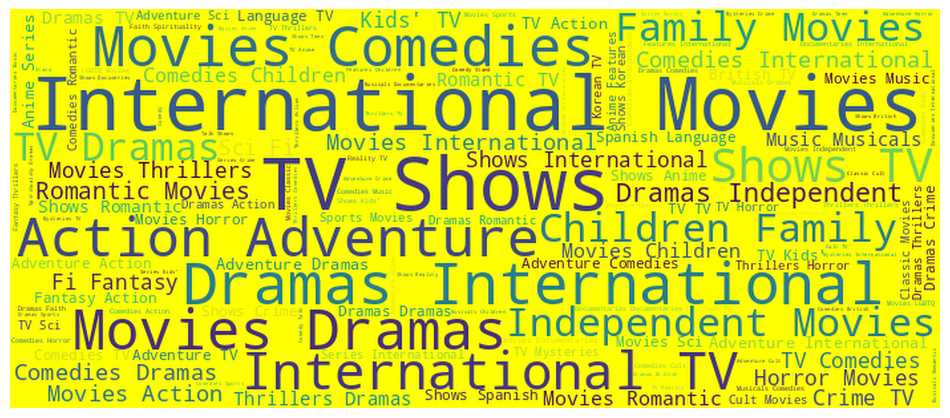

In [ ]:
#5. Which genre movies are more popular or produced more

from wordcloud import WordCloud
text=' '.join(df["listed_in"])
wordcloud=WordCloud(width=700,height=300,background_color='yellow').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='lanczos')
plt.axis('off')
plt.show()

**INSIGHT**: By the plot, we can observe most popular genre in Netflix is International Movies followed by Tv shows, Comdey, Dramas.
So these kind of genres are most recommended to the Netflix to get more popular.

In [ ]:
#6. Find After how many days the movie will be added to Netflix after the release of the movie.

df["year_diff"]=df["year_added"]-df["release_year"]
df["year_diff"]

0       1
1       0
1       0
1       0
1       0
       ..
8806    4
8806    4
8806    4
8806    4
8806    4
Name: year_diff, Length: 205237, dtype: int64

In [ ]:
df["year_diff"].mode()

0    0
Name: year_diff, dtype: int64

**INSIGHT**: With the mode() function understood that every day a movie will be released in the Netflix. For better future growth Netflix should continue this.